<a href="https://colab.research.google.com/github/KeoratileShongoane/AML/blob/main/Putting_it_together.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
# **Applications of Machine Learning in Chemistry**: Assignment 4
#### __Name:__ Keoratile Shongoane
#### __Student number:__ 1389986

***


# **Table of Contents**

- [Imports](#imports)
- [1. Data Exploration](#1-data-exploration)
  - [1.1 Importing Data](#11-importing-data)
  - [1.2 Viewing the Dataset](#12-viewing-the-dataset)
  - [1.3 Dropping Missing Values](#13-dropping-missing-values)
- [2. Molecular Descriptors Calculation](#2-molecular-descriptors-calculation)
- [3. Data Preprocessing](#3-data-preprocessing)
  - [3.1 Train-Test Split](#31-train-test-split)
- [4. Model Training and Evaluation](#4-model-training-and-evaluation)
  - [4.1 Random Forest Regression](#41-random-forest-regression)
  - [4.2 Model Evaluation](#42-model-evaluation)
- [5. Visualizations](#5-visualizations)
  - [5.1 Melting Point](#51-melting-point)
  - [5.2 Boiling Point](#52-boiling-point)
- [6. Results Discussion and Conclusion](#6-results-discussion-and-conclusion)
  - [6.1 Results Discussion and Conclusion](#61-results-discussion-and-conclusion)


This assignment will focus on understanding the heat dynamics of various hydrocarbons. The hydrocarbons data set contains a set of molecules made up of only carbon and hydrogen.

# __Imports__

In [13]:
# In a Jupyter cell
%pip install rdkit-pypi

from sklearn.impute import SimpleImputer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors



# __1. Data Exploration__

### __1.1 Importing Data__

In [14]:
# loading the dataset to a Pandas Dataframe
df = pd.read_csv('hydrocarbons.csv')

### __1.2 Viewing the dataset__

Veiwing the dataset allows us to spot any anormalies and allows one to understand the data that they are working with. This allows for the use of appropriate anaylsis techniques.

In [15]:
# Viewing the dataset
df.head(194)

,Class of hydrocarbon,IUPAC name,Melting point,Boiling point,Density,Flash point,Autoignition temp,pubchem_id,smiles
0,Trimetylalkane,"2,2,4-Trimethylpentane",-107.0,99.0,0.69,NaN,396,10907,CC(C)CC(C)(C)C
1,Triaromatics,Phenanthrene,99.0,338.0,1.18,171,>450,995,C1=CC=C2C(=C1)C=CC3=CC=CC=C32
2,Triaromatics,Anthracene,216.0,341.0,1.2825,NaN,NaN,8418,C1=CC=C2C=C3C=CC=CC3=CC2=C1
3,Triaromatics,1-methylanthracene,86.0,342.0,1.04799,NaN,NaN,11884,CC1=CC=CC2=CC3=CC=CC=C3C=C12
4,Triaromatics,2-methylanthracene,209.0,340.0,1.8,NaN,NaN,11936,CC1=CC2=CC3=CC=CC=C3C=C2C=C1
...,...,...,...,...,...,...,...,...,...
189,1-alkene,1-hexadecene,4.0,285.0,0.781,NaN,NaN,12395,CCCCCCCCCCCCCCC=C
190,1-alkene,1-heptadecene,11.0,301.0,0.785,NaN,NaN,23217,CCCCCCCCCCCCCCCC=C
191,1-alkene,1-octadecene,18.0,316.0,0.789,NaN,NaN,8217,CCCCCCCCCCCCCCCCC=C
192,1-alkene,1-nonadecene,23.0,331.0,0.78925,NaN,NaN,29075,CCCCCCCCCCCCCCCCCC=C


In [16]:
# dataset information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Class of hydrocarbon  194 non-null    object 
 1   IUPAC name            194 non-null    object 
 2   Melting point         188 non-null    float64
 3   Boiling point         190 non-null    float64
 4   Density               189 non-null    object 
 5   Flash point           77 non-null     object 
 6   Autoignition temp     63 non-null     object 
 7   pubchem_id            194 non-null    int64  
 8   smiles                194 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 13.8+ KB


In [17]:
# Null values
df.isnull().sum()


,0
Class of hydrocarbon,0
IUPAC name,0
Melting point,6
Boiling point,4
Density,5
Flash point,117
Autoignition temp,131
pubchem_id,0
smiles,0


In [18]:
# calculating descriptive statistics
df.describe()

,Melting point,Boiling point,pubchem_id
count,188.000000,190.000000,1.940000e+02
mean,-30.558511,208.631579,5.575594e+04
std,81.925437,139.303563,3.310518e+05
min,-188.000000,-162.000000,2.410000e+02
25%,-95.000000,112.000000,8.967500e+03
50%,-27.500000,205.500000,1.240400e+04
75%,15.250000,298.000000,1.938925e+04
max,256.000000,625.000000,4.526742e+06


### __1.3 Dropping missing values__

Random Forrest Regression does not support null values. Therefore the nulls have to be dropped.

In [19]:
# Dropping the columns
df = df.drop(['Flash point','Autoignition temp'], axis=1)

# Drop null values
df = df.dropna()

# __2. Molecular Descriptors Calculation__

The molecular descriptors are an argument, and returns a Python dictionary with values as keys - if multiple SMILES strings are supplied, "from_smiles" returns a list of dictionaries.

In [20]:
# Function to generate molecular weight and number of aromatic bonds
def generate_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        descriptors = {
            'MolWt': Descriptors.MolWt(mol),                # Molecular Weight
            'NumAromaticBonds': sum(1 for bond in mol.GetBonds() if bond.GetIsAromatic())  # Number of Aromatic Bonds
        }
        return pd.Series(descriptors)
    else:
        return pd.Series({'MolWt': None, 'NumAromaticBonds': None})

# Apply the generate_descriptors function to the SMILES column of the original DataFrame
descriptor_df = df['smiles'].apply(generate_descriptors)

# Concatenate the original DataFrame with the new descriptors DataFrame
df = pd.concat([df, descriptor_df], axis=1)

# Display the first few rows of the resulting DataFrame
print(df.head())

  Class of hydrocarbon              IUPAC name  Melting point  Boiling point  \
0       Trimetylalkane  2,2,4-Trimethylpentane         -107.0           99.0   
1         Triaromatics            Phenanthrene           99.0          338.0   
2         Triaromatics              Anthracene          216.0          341.0   
3         Triaromatics      1-methylanthracene           86.0          342.0   
4         Triaromatics      2-methylanthracene          209.0          340.0   

   Density  pubchem_id                         smiles    MolWt  \
0     0.69       10907                 CC(C)CC(C)(C)C  114.232   
1     1.18         995  C1=CC=C2C(=C1)C=CC3=CC=CC=C32  178.234   
2   1.2825        8418    C1=CC=C2C=C3C=CC=CC3=CC2=C1  178.234   
3  1.04799       11884   CC1=CC=CC2=CC3=CC=CC=C3C=C12  192.261   
4      1.8       11936   CC1=CC2=CC3=CC=CC=C3C=C2C=C1  192.261   

   NumAromaticBonds  
0               0.0  
1              16.0  
2              16.0  
3              16.0  
4           

# __3. Data Preprocessing__

### __3.1 Train-Test Split__

In [21]:
# Define the feature columns and the target columns
X = df[['MolWt', 'NumAromaticBonds']]
y_boiling_point = df['Boiling point']   # Replace with the actual column name for boiling point
y_melting_point = df['Melting point']   # Replace with the actual column name for melting point

# Split the data into training and test sets
X_train, X_test, y_boiling_train, y_boiling_test = train_test_split(X, y_boiling_point, test_size=0.2, random_state=42)
X_train, X_test, y_melting_train, y_melting_test = train_test_split(X, y_melting_point, test_size=0.2, random_state=42)


# __4. Model Training and Evaluation__

#### Here, I trained 1 model, namely: `Random Forest Regression`.




### __4.1 Random Forest Regression__

Random Forrest Regression does not support null values.

In [22]:
# Initialize and train the model for melting point
melting_model = RandomForestRegressor(random_state=42)
melting_model.fit(X_train, y_melting_train)

# Make predictions
y_melting_pred = melting_model.predict(X_test)


In [23]:


# Initialize and train the model for boiling point
boiling_model = RandomForestRegressor(random_state=42)
boiling_model.fit(X_train, y_boiling_train)

# Make predictions
y_boiling_pred = boiling_model.predict(X_test)


### __4.2 Model Evaluation__

In this report the following evaluation metrics are used:



*   `Mean Squared Error`
*   `Root Mean Squared Error`
*   `R-squared`

In [24]:
# Evaluate the melting point model
melting_mse = mean_squared_error(y_melting_test, y_melting_pred)
melting_rmse = np.sqrt(melting_mse)
melting_r2 = r2_score(y_melting_test, y_melting_pred)

# Print the results
print(f'Melting Point Model - MSE: {melting_mse:.3f}, RMSE: {melting_rmse:.3f}, R^2: {melting_r2:.3f}')

Melting Point Model - MSE: 1862.262, RMSE: 43.154, R^2: 0.589


In [29]:
# Evaluate the boiiing point model
boiling_mse = mean_squared_error(y_boiling_test, y_boiling_pred)
boiling_rmse = np.sqrt(boiling_mse)
boiling_r2 = r2_score(y_boiling_test, y_boiling_pred)

print(f'Boiling Point Model - MSE: {boiling_mse}, RMSE: {boiling_rmse:.3f}, R^2: {boiling_r2}')

Boiling Point Model - MSE: 149.27007479262042, RMSE: 12.218, R^2: 0.9900004035843643


In [30]:
# Print the final results
print(f'Boiling Point Prediction - MSE: {boiling_mse}, R^2: {boiling_r2}, RMSE: {boiling_rmse:.3f}')
print(f'Melting Point Prediction - MSE: {melting_mse}, R^2: {melting_r2}, RMSE: {melting_rmse:.3f} ')


Boiling Point Prediction - MSE: 149.27007479262042, R^2: 0.9900004035843643, RMSE: 12.218
Melting Point Prediction - MSE: 1862.2615882787122, R^2: 0.5891277340566354, RMSE: 43.154 


# __5. Visualizations__

### __5.1 Melting Point__

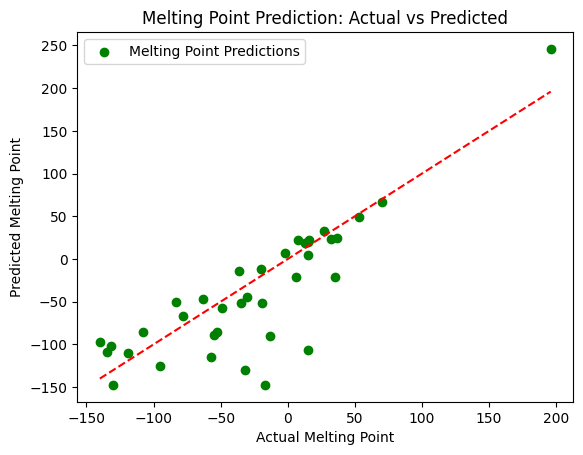

In [27]:
# Scatter plot for Melting Point
plt.scatter(y_melting_test, y_melting_pred, color='green', label='Melting Point Predictions')
plt.plot([min(y_melting_test), max(y_melting_test)], [min(y_melting_test), max(y_melting_test)], color='red', linestyle='--')
plt.xlabel('Actual Melting Point')
plt.ylabel('Predicted Melting Point')
plt.title('Melting Point Prediction: Actual vs Predicted')
plt.legend()
plt.show()


### __5.2 Boiling Point__

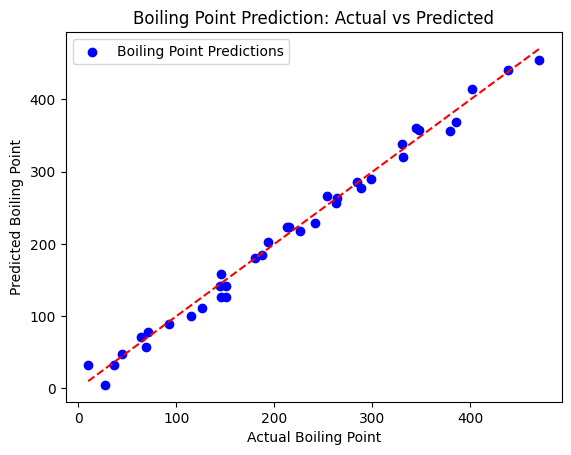

In [28]:
# Scatter plot for Boiling Point
plt.scatter(y_boiling_test, y_boiling_pred, color='blue', label='Boiling Point Predictions')
plt.plot([min(y_boiling_test), max(y_boiling_test)], [min(y_boiling_test), max(y_boiling_test)], color='red', linestyle='--')
plt.xlabel('Actual Boiling Point')
plt.ylabel('Predicted Boiling Point')
plt.title('Boiling Point Prediction: Actual vs Predicted')
plt.legend()
plt.show()


# 6. Results discussion and Conclusion

### 6.1. Results Discussion and Conclusion

### Results Discussion and Conclusion

#### **Melting Point Model**
- **Mean Squared Error (MSE):** 1862.262
- **Root Mean Squared Error (RMSE):** 43.154
- **R-squared (R^2):** 0.589

The Melting Point Model has an R^2 value of 0.589, meaning it explains about 59% of the differences in melting points. This is decent but suggests the model could be better with more features or a more complex approach.

The RMSE of 43.154 shows that the model's predictions are off by about 43 units on average. Depending on the melting point range in the dataset, this might be too large, indicating the need for improvement.

**Scatter Plot Analysis:** The scatter plot comparing predicted and actual melting points shows some correlation, but points are spread out. This suggests that the model is accurate in some cases but less so in others. There might be specific cases where the model struggles, possibly due to missing features or outliers.

#### **Boiling Point Model**
- **Mean Squared Error (MSE):** 149.270
- **Root Mean Squared Error (RMSE):** 12.218
- **R-squared (R^2):** 0.990

The Boiling Point Model has an R^2 value of 0.990, meaning it explains about 99% of the differences in boiling points. This is excellent, showing that the model is very good at predicting boiling points based on the given features.

The RMSE of 12.218 means the model's predictions are very close to the actual values, with a small average error, showing high accuracy.

**Scatter Plot Analysis:** The scatter plot for boiling points shows that the predicted values are very close to the actual values, with most points lying near the diagonal line. There are a few slight deviations, but overall, the model performs very well.

### **Challenges Encountered**
- **Limited Features:** The dataset only included molecular weight and aromatic bonds. With more features, the model might have been more accurate, especially for melting points.
- **Possible Overfitting:** The very high R^2 value for boiling points suggests that the model might be too closely fitted to the training data, which could affect its performance on new data.
- **Data Imbalance:** If the dataset had uneven distribution of melting and boiling points, it could affect model performance, especially for less common ranges.

### **Potential Improvements**
- **Adding Features:** Including more features, like hydrogen bond donors/acceptors or logP, could improve the models.
- **Tuning the Model:** Adjusting the Random Forest model's settings with techniques like GridSearchCV or RandomizedSearchCV could improve performance, especially for melting points.
- **Cross-Validation:** Using cross-validation would give a better estimate of the model’s performance and help reduce overfitting.
- **Exploring Other Models:** Trying different models, like Support Vector Regression (SVR), Gradient Boosting, or deep learning, could provide better predictions.

### **Conclusion**
The Random Forest model did a great job predicting boiling points, with predictions very close to the actual values. The scatter plot confirms this high performance. However, the melting point model needs improvement, as the scatter plot shows more variation in predictions. By adding more features, adjusting the model, and trying other methods, we can enhance the accuracy for predicting melting points. This project shows the importance of choosing the right features, fine-tuning models, and using visualizations to evaluate and improve model performance.